# Multi linear regression

##  Import Libraries

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
from scipy import stats
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api  as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
startupdata_data = pd.read_csv('50_Startups.csv')
startupdata_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startupdata_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data understanding

In [4]:
startupdata_data.shape

(50, 5)

In [5]:
startupdata_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startupdata_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startupdata_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
startupdata_data = startupdata_data.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MKTS'},axis=1)
startupdata_data 


,RDS,ADS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
startupdata_data[startupdata_data.duplicated()] #no duplicated data

,RDS,ADS,MKTS,State,Profit


In [10]:
startupdata_data.describe()

,RDS,ADS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Normality test 

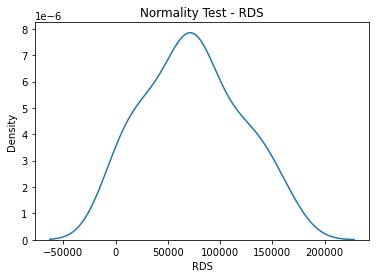

In [11]:
sns.distplot(a=startupdata_data['RDS'],hist=False)
plt.title('Normality Test - RDS')
plt.show()

In [12]:
startupdata_data['RDS'].skew()

0.164002172321177

In [13]:
startupdata_data['RDS'].kurtosis()

-0.7614645568424674

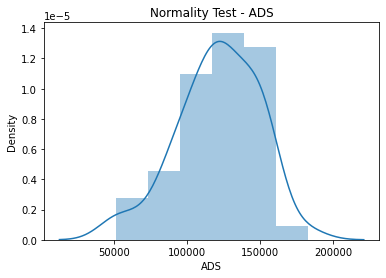

In [14]:
sns.distplot(a=startupdata_data['ADS'],hist=True)
plt.title('Normality Test - ADS')
None

In [15]:
startupdata_data['ADS'].skew()

-0.4890248099671768

In [16]:
startupdata_data['ADS'].kurtosis()

0.22507113536865386

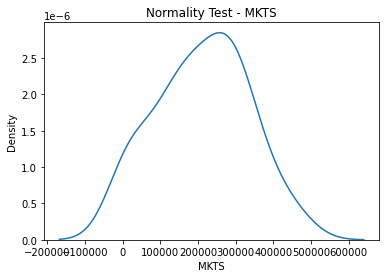

In [17]:
sns.distplot(a=startupdata_data['MKTS'],hist=False)
plt.title('Normality Test - MKTS')
plt.show()

In [18]:
startupdata_data['MKTS'].skew()

-0.04647226758360412

In [19]:
startupdata_data['MKTS'].kurtosis()

-0.6717011281297514

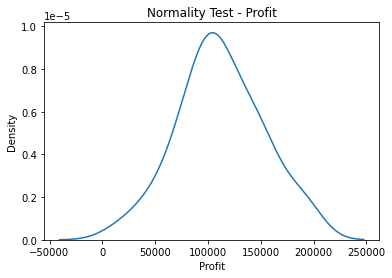

In [20]:
sns.distplot(a=startupdata_data['Profit'],hist= False)
plt.title('Normality Test - Profit')
plt.show()

In [21]:
startupdata_data['Profit'].skew()

0.023291019769116614

In [22]:
startupdata_data['Profit'].kurtosis()

-0.06385888546853113

### Normality test using probplot

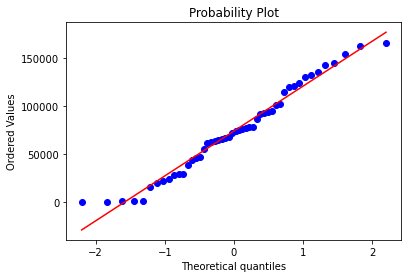

In [23]:
stats.probplot(x=startupdata_data['RDS'],dist='norm',plot=plt)
None

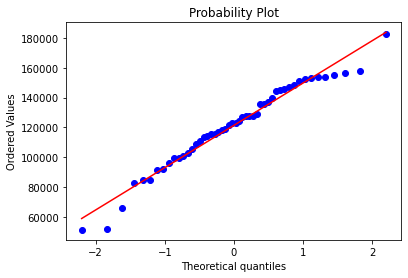

In [24]:
stats.probplot(x=startupdata_data['ADS'],dist='norm',plot=plt)
plt.show()

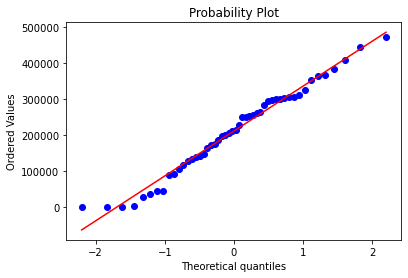

In [26]:
stats.probplot(x=startupdata_data['MKTS'],dist='norm',plot=plt)
plt.show()

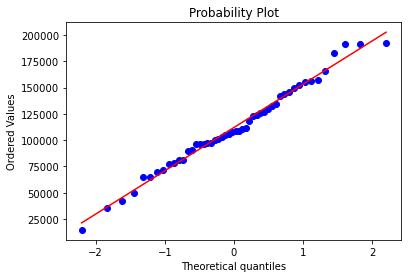

In [27]:
stats.probplot(x=startupdata_data['Profit'],dist='norm',plot=plt)
plt.show()

#### Normality  test is failed

### Linearity test

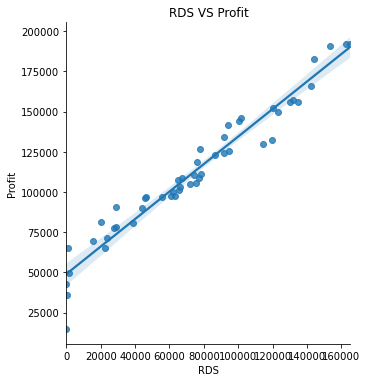

In [28]:
sns.lmplot(x='RDS',y='Profit',data=startupdata_data)
plt.title('RDS VS Profit')
None


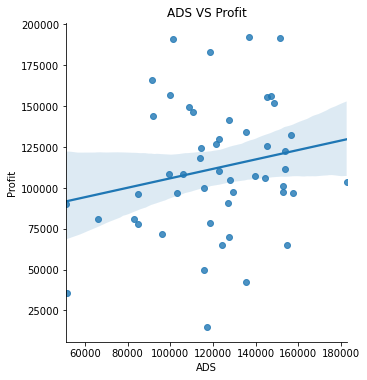

In [29]:
sns.lmplot(x='ADS',y='Profit',data=startupdata_data)
plt.title('ADS VS Profit')
plt.show()


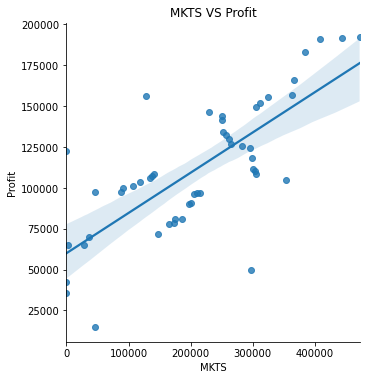

In [31]:
sns.lmplot(x='MKTS',y='Profit',data=startupdata_data)
plt.title('MKTS VS Profit')
plt.show()


#### Linearity test failed

### Correlation

In [32]:
startupdata_corr_matrix = startupdata_data.corr().round(3)
startupdata_corr_matrix

,RDS,ADS,MKTS,Profit
RDS,1.000,0.242,0.724,0.973
ADS,0.242,1.000,-0.032,0.201
MKTS,0.724,-0.032,1.000,0.748
Profit,0.973,0.201,0.748,1.000


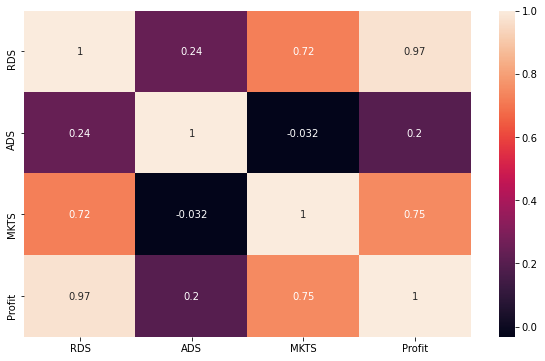

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(data=startupdata_corr_matrix,annot=True)
plt.show()

### Let's create a Reference data to understand how the x features should behave with y axis.

In [34]:
startupdata_data.shape

(50, 5)

In [35]:
X = np.random.randn(81)
y = 10 * X + np.random.randn(81)*2

In [36]:
X_df = pd.DataFrame(data=[X,y]).T
X_df.columns= ['X','y']
X_df

,X,y
0,0.855432,7.054943
1,-0.221888,-4.333488
2,0.428726,6.323786
3,-0.016882,-1.062236
4,-1.802923,-19.306948
...,...,...
76,-0.752736,-10.073359
77,0.049382,1.644071
78,0.167813,0.323645
79,-0.855563,-10.037497


### 1. Linearity Test - Passed

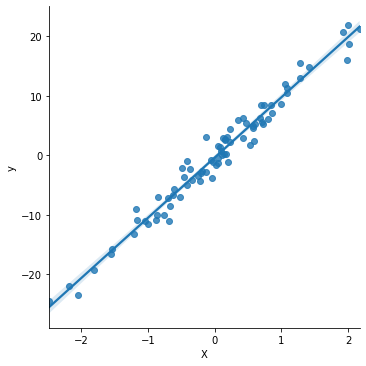

In [37]:
sns.lmplot(x='X',y='y',data=X_df)
None

### 2. Normality Test - Passed

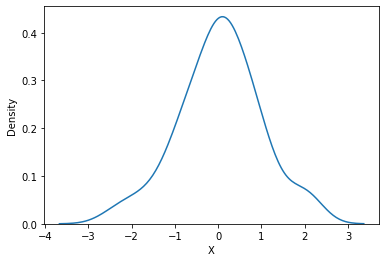

In [38]:
sns.distplot(a=X_df['X'],hist=False)
plt.show()

In [39]:
X_df.skew()

X   -0.130320
y   -0.139979
dtype: float64

In [40]:
X_df.kurtosis()

X    0.316790
y    0.241501
dtype: float64

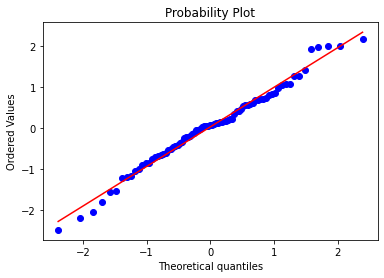

In [41]:
stats.probplot(x = X_df['X'],dist='norm',plot=plt)
plt.show()

### 3. Multicollinearity Test - Passed.

### 4. AutoRegression Test - Passed.

### 5. Homoscedasticity Test || 6. Zero Residual Mean Test

## Model Building

In [42]:
X = X_df[['X']]
y = X_df[['y']]

## Model Training using sklearn library

In [43]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #Object Creation/Model Initialization
linear_model.fit(X,y)

LinearRegression()

In [44]:
linear_model.intercept_

array([-0.37221948])

In [45]:
linear_model.coef_

array([[10.13588668]])

## Model Testing

In [46]:
y_pred = linear_model.predict(X)

## Model Evaluation

In [47]:
y

,y
0,7.054943
1,-4.333488
2,6.323786
3,-1.062236
4,-19.306948
...,...
76,-10.073359
77,1.644071
78,0.323645
79,-10.037497


In [48]:
y_pred

array([[  8.29834725],
       [ -2.62124646],
       [  3.97329696],
       [ -0.54333743],
       [-18.64644447],
       [  3.94404722],
       [ -7.06426569],
       [ 20.02701128],
       [ -4.56089274],
       [-10.50995005],
       [ -4.05570919],
       [  0.57226732],
       [-12.22141002],
       [  1.19027044],
       [-21.07483698],
       [  5.77604099],
       [ 19.73755741],
       [  9.66776657],
       [  1.90620036],
       [  5.07211933],
       [  4.41955099],
       [ 19.85627555],
       [  2.04591409],
       [ 19.19027201],
       [-12.56911326],
       [  1.46631077],
       [ 13.93218535],
       [ 12.57302945],
       [ -6.57689668],
       [ -8.92412664],
       [  6.87675441],
       [  0.78984656],
       [  6.94371758],
       [ 10.36360562],
       [ -1.63056696],
       [-25.45851761],
       [ -6.63693406],
       [  5.56570154],
       [ -5.34907408],
       [ 10.57777025],
       [  7.80450109],
       [ -9.32188688],
       [  5.48289045],
       [-12

In [49]:
error = y - y_pred
error

,y
0,-1.243404
1,-1.712242
2,2.350489
3,-0.518898
4,-0.660503
...,...
76,-2.071489
77,1.515762
78,-1.005070
79,-0.993387


### 5. Homoscedasticity Check

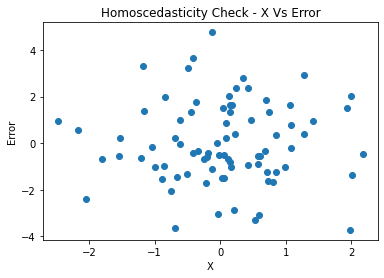

In [50]:
plt.scatter(x = X_df['X'],y = error)
plt.title('Homoscedasticity Check - X Vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

### 6. Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

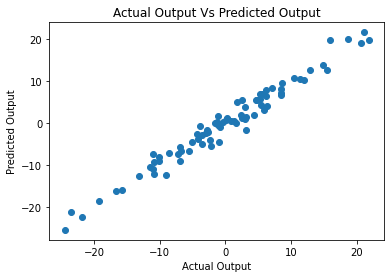

In [51]:
plt.scatter(x = y,y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

### Zero residual Mean Test is Passed.

## =======================================================================

# Come back to DATA

In [52]:
startupdata_data.head()

,RDS,ADS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### scatterplots between variables along with histogram

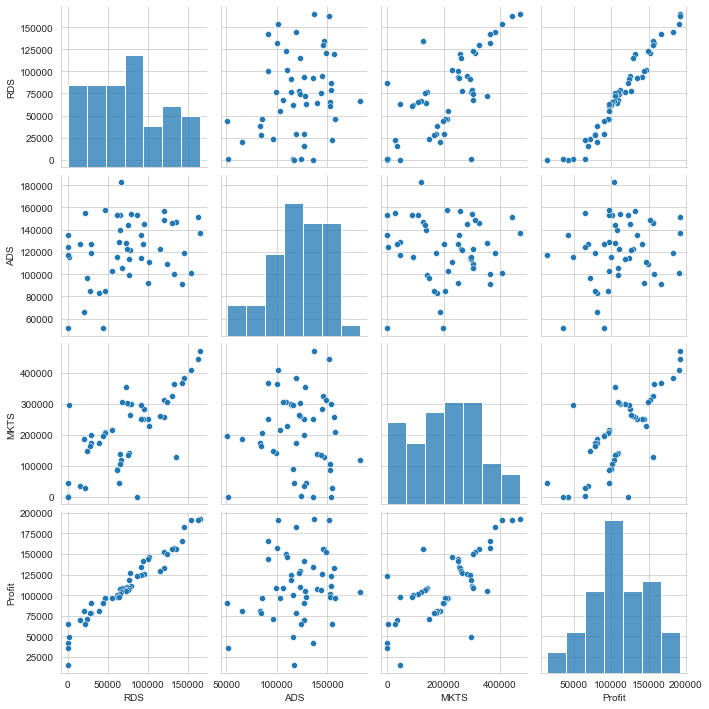

In [53]:
### FORMAT THE PLOT BACKGROUND AND SCATTERPLOTS FOR ALL VARIABLES
sns.set_style(style='whitegrid')
sns.pairplot(startupdata_data)
plt.show()

### Applying log function 

In [54]:
X_input = startupdata_data.copy()
X_input.head()

,RDS,ADS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
X_input['log_RDS']  = np.log(X_input['RDS'])
X_input['log_ADS']  = np.log(X_input['ADS'])
X_input['log_MKTS'] = np.log(X_input['MKTS'])
X_input

,RDS,ADS,MKTS,State,Profit,log_RDS,log_ADS,log_MKTS
0,165349.20,136897.80,471784.10,New York,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,California,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,Florida,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,New York,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,Florida,166187.94,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,New York,156991.12,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,California,156122.51,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,Florida,155752.60,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,New York,152211.77,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,California,149759.96,11.722659,11.596155,12.628007


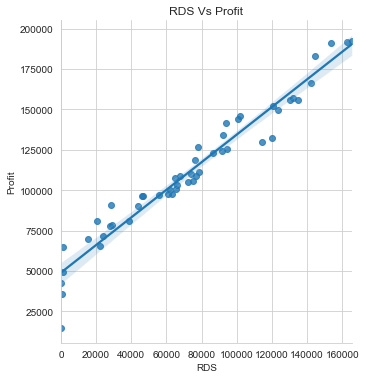

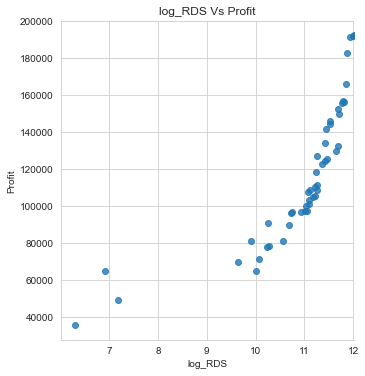

In [56]:
sns.lmplot(x='RDS',y='Profit',data=X_input)
plt.title('RDS Vs Profit')

sns.lmplot(x='log_RDS',y='Profit',data=X_input)
plt.title('log_RDS Vs Profit')
plt.show()

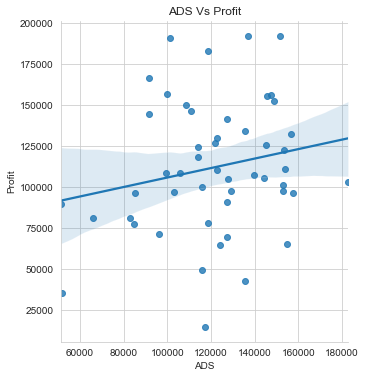

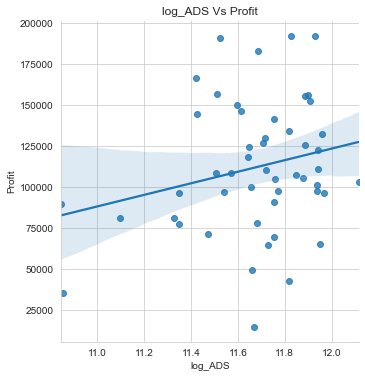

In [57]:
sns.lmplot(x='ADS',y='Profit',data=X_input)
plt.title('ADS Vs Profit')

sns.lmplot(x='log_ADS',y='Profit',data=X_input)
plt.title('log_ADS Vs Profit')
plt.show()

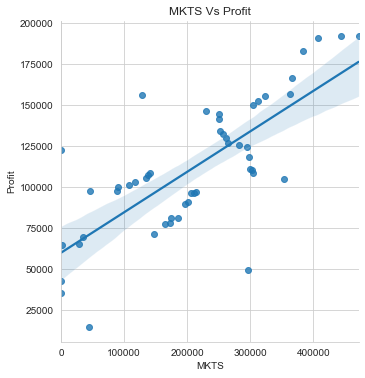

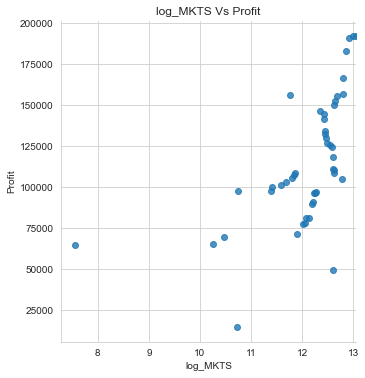

In [58]:
sns.lmplot(x='MKTS',y='Profit',data=X_input)
plt.title('MKTS Vs Profit')

sns.lmplot(x='log_MKTS',y='Profit',data=X_input)
plt.title('log_MKTS Vs Profit')
plt.show()

## Model Building

In [59]:
model = smf.ols('Profit~RDS+ADS+MKTS',data=startupdata_data).fit()

### Model Testing

In [60]:
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MKTS             0.027228
dtype: float64

In [61]:
#FINDING PVALUES AND TVALUES
print(model.tvalues, '\n', model.pvalues)


Intercept     7.626218
RDS          17.846374
ADS          -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADS          6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [62]:
#R SQUARED VALUE
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## Simple linear regression model

In [63]:
simple_linear_regression_1 = smf.ols('Profit~ADS' ,data=startupdata_data).fit()
simple_linear_regression_1.tvalues,simple_linear_regression_1.pvalues #ADS HAS MORE SIGNIFICANT PVALUE
simple_linear_regression_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 22 Feb 2022   Prob (F-statistic):              0.162
Time:                        12:19:25   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADS            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
simple_linear_regression_2 = smf.ols('Profit~MKTS' ,data=startupdata_data).fit()
simple_linear_regression_2.tvalues,simple_linear_regression_2.pvalues #MKTC HAS MORE SIGNIFICANT PVALUE
simple_linear_regression_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.38e-10
Time:                        12:19:26   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKTS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
simple_linear_regression_4= smf.ols('Profit~ADS+MKTS' ,data=startupdata_data).fit()
simple_linear_regression_4.tvalues,simple_linear_regression_4.pvalues #VARIABLES HAVE SIGNIFICANT PVALUES
simple_linear_regression_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.50e-10
Time:                        12:19:28   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADS            0.3237      0.131      2.468      0.017       0.060       0.588
MKTS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model validation techniques

##   Two Techniques: 1. Collinearity Check

In [66]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADS+MKTS",data=startupdata_data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADS~RDS+MKTS",data=startupdata_data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADS",data=startupdata_data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADS,1.175091
2,MKTS,2.326773


In [67]:
# NONE VARIABLE HAS VID>20 , NO COLLINEARITY, SO CONSIDER ALL VARIABLE IN REGRESSION EQUATION

## 2. Residual test

###  Test for normality for  residuals (Q-Q plot)

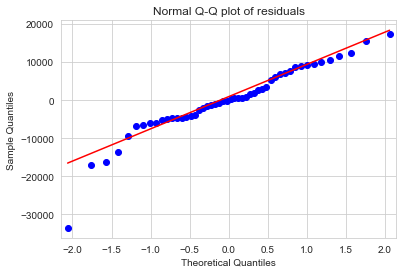

In [68]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') #line = 45 to draw the diagnoal line
plt.title('Normal Q-Q plot of residuals')
plt.show()


In [69]:
list(np.where(model.resid<-20000)) #OUTLIER DETECTION FROM ABOVE Q-Q PLOT OF RESIDUALS.

[array([49], dtype=int64)]

## Test for Homoscedasticity or Heteroscedasticity

In [70]:
def standard_values( vals ):
    return (vals - vals.mean())/vals.std()

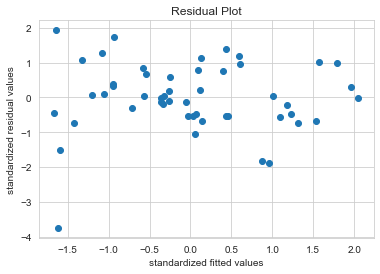

In [71]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

## Residuals Vs Regressor

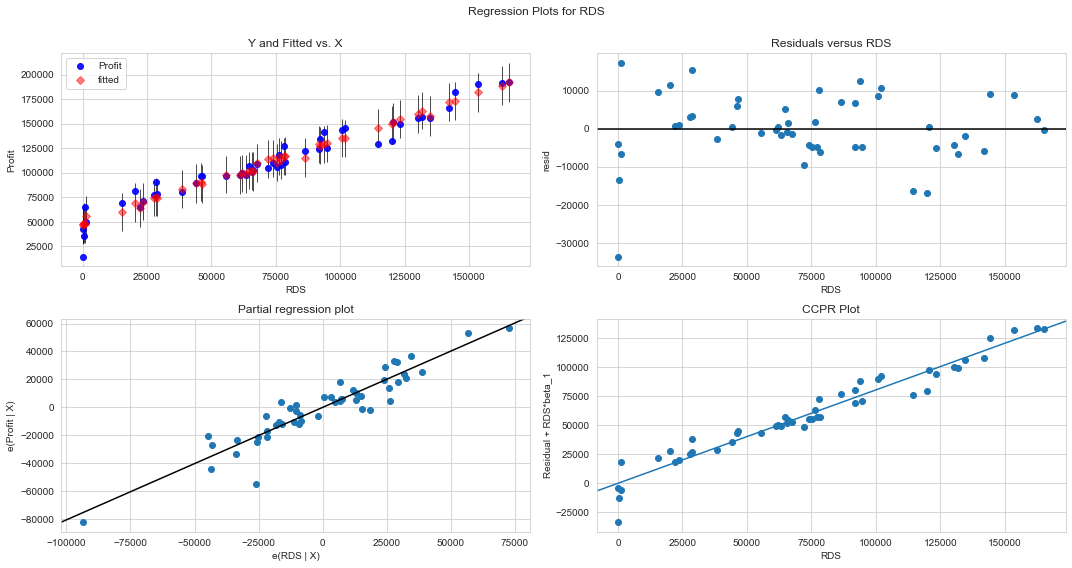

In [72]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model , 'RDS' ,fig=fig)
plt.show()
                            

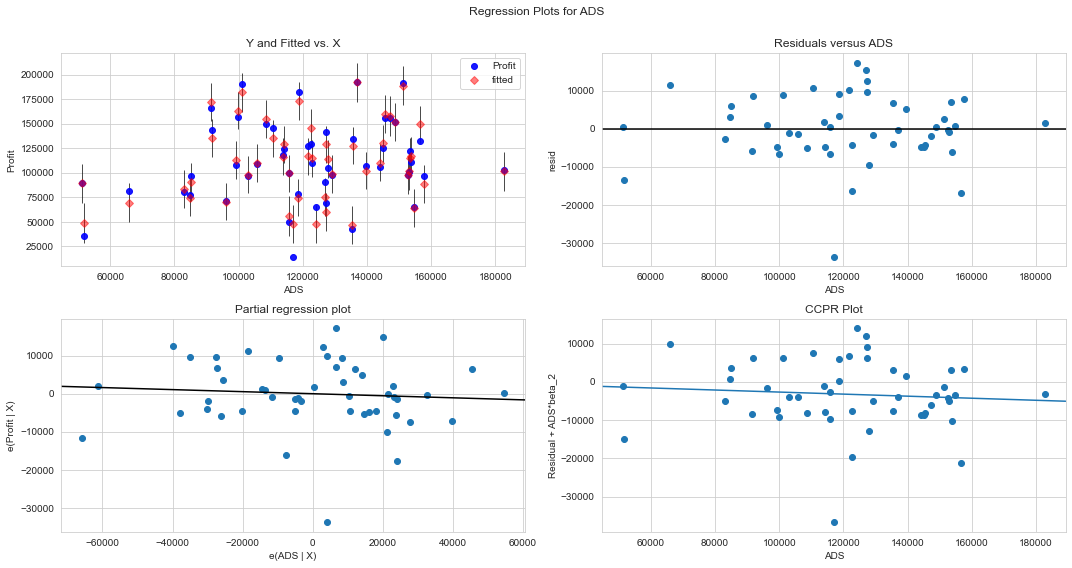

In [73]:
fig =plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

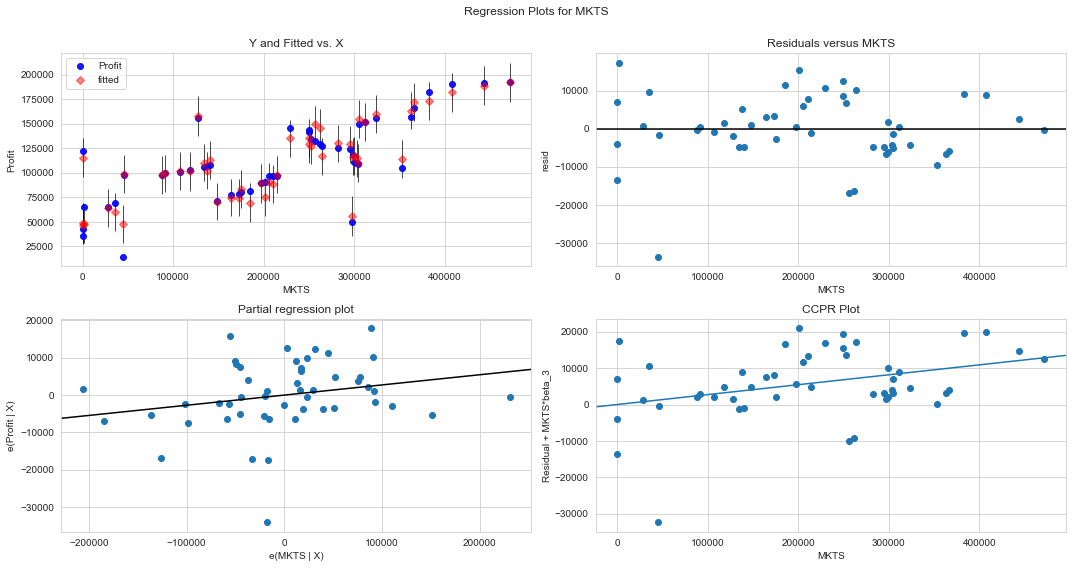

In [74]:
fig =plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model deletion diagnostics (checking outliers or influencers)

In [75]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

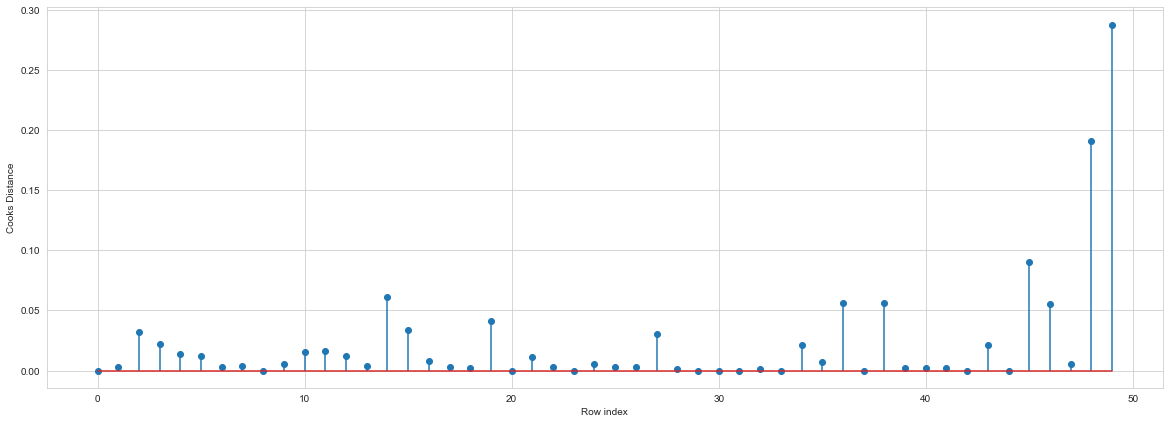

In [76]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startupdata_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
None

In [77]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

## 2. Leverage value

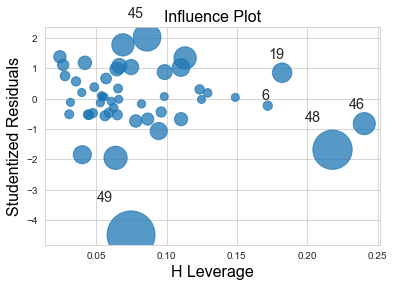

In [78]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [79]:
startupdata_data.shape

(50, 5)

In [82]:
k = startupdata_data.shape[1]
n = startupdata_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [83]:
startupdata_data[startupdata_data.index.isin([49])] 

,RDS,ADS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the model

In [84]:
startupdata_data_1 = startupdata_data.copy()
startupdata_data_1

,RDS,ADS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [85]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startupdata_data_2=startupdata_data_1.drop(startupdata_data_1.index[[49]],axis=0).reset_index(drop=True)
startupdata_data_2

,RDS,ADS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [86]:
final_data = smf.ols('Profit~ADS+RDS+MKTS',data=startupdata_data_2).fit()
final_data.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           8.85e-32
Time:                        12:20:46   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
ADS           -0.0222      0.043     -0.518      0.607      -0.109       0.064
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# R squared values
final_data.rsquared ,final_data.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

## Predicting for new data

In [88]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':50000,"ADS":90000,"MKTS":180000},index=[0])
new_data

,RDS,ADS,MKTS
0,50000,90000,180000


In [89]:
# Manual Prediction of Price
final_data.predict(new_data)

0    94076.462322
dtype: float64

In [90]:
pred_y=final_data.predict(startupdata_data_2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## Table containing R^2 value for each prepared mode

In [91]:
data={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_data.rsquared]}
table=pd.DataFrame(data)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
